### Comparison of basic clustering techniques 


Inspired by Karpathy @karpathy randomfun/knn_vs_svm

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats 

In [22]:
X = np.array([  [1.0, 2.5],
  [3.5, 4.0],
  [6.0, 1.5],
  [7.5, 2.0],
  [2.0, 6.0],
  [4.0, 7.0]
])

y = np.array(['A', 'A', 'B', 'B', 'A', 'A'])

x_new = np.array([4.0, 3.5])

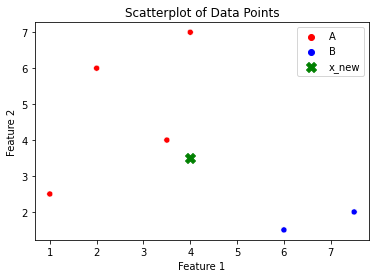

In [7]:
# Create a DataFrame from the data
data = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
data['Label'] = y

# Plot the scatterplot using seaborn
sns.scatterplot(data=data, x='Feature 1', y='Feature 2', hue='Label', palette={'A': 'red', 'B': 'blue'})

# Plot the new data point
plt.scatter(x_new[0], x_new[1], label='x_new', color='green', marker='X', s=100)

# Customize the plot
plt.legend()
plt.title('Scatterplot of Data Points')

# Show the plot
plt.show()

### Manual Implementation of knn

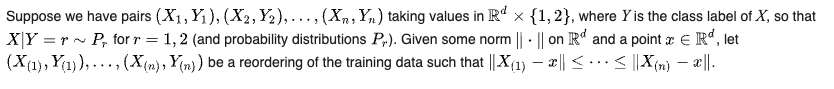 

(from wikipedia)

what does this mean? 


- non parametric estimation: it does not assume any specific form for the underlying disytribution of the data 
- conditional probability: P(A|x) = probability that a point x belongs to class b. Note that p(x) is the marginal probability of observing that datapoint x regardless of its class.

                        Bayes : P(A|x) = P(A) * P(x|A)/P(x)
                        
                        P(A) * P(x|A) = P(x) * P(A|x)

KNN estimates the probability P(A|x) by looking at the nearest neighbors, such as:

                        P(A|x) ≈ count(A in k-nearest neighbors) / k
                        
(you can apply a gaussian kernel or parzen window to make it more accurate. those will weigh each datapoint by the distance)


In [8]:
def dist(x, y, dist_type='eu'):
    
    if dist_type == 'eu':
        return np.sqrt(np.sum((y-x)**2, axis=1))
    elif dist_type == 'manhattan':
        return np.sum(np.abs((y-x)), axis=1)
    elif dist_type == 'cos':
        # euclidian distances have odd behaviours in high dimensional spaces
        # this assumes the vectors are in the unit hypersphere; hence (a @ b) = cos(theta)  
        return y.dot(x) 

def knn(x_new, X, y=None, k=3, dist_type='eu'):
    inv_similarity = dist(x_new, X, dist_type)
    
    if k == 1:
        if y is not None:
            return y[inv_similarity.argmin()]
        else:
            return inv_similarity.argmin()
    else:
        idx = np.argsort(inv_similarity)
        if y is not None:
            return scipy.stats.mode(y[idx[:k]])
        else:
            return idx[:k]
    

In [9]:
knn(x_new, X, y, k=2, dist_type='cos')

ModeResult(mode=array(['A'], dtype='<U1'), count=array([2]))

### SVM: Support vector machine

SVM s find an optimal hyperplane that spearates the data points in space. Instead of using euclidian distance, like we did in KNN it fits the data into a manifold . 

In [23]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline

p = make_pipeline(OneHotEncoder(),
            StandardScaler(),
            svm.LinearSVC(class_weight='balanced', verbose=False, max_iter=10000, tol=1e-6, C=0.1)
            )
clf = svm.LinearSVC(class_weight='balanced', verbose=False, max_iter=10000, tol=1e-6, C=0.1)
clf.fit(X, y) # train

LinearSVC(C=0.1, class_weight='balanced', max_iter=10000, tol=1e-06,
          verbose=False)

In [28]:
p.fit(X, y)

ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.

In [11]:
x_new = np.array([1.0, 7])
k = 3
similarities = clf.decision_function(x_new.reshape(1, 2))
sorted_ix = np.argsort(-similarities)
similarities[sorted_ix[:k]]

similarities

array([-1.97027709])

### Embeddings 

How do embedding relate to the above?
The idea of knn is to find points 'close in space'. 
Embeddings are vector representations of discrete objects in a continuous vector space. Ergo, you can run a knn on the result of an embedding. 

In [12]:
# Create random toy embedding 

import numpy as np
np.random.seed(42)

embeddings = np.random.randn(1000, 1536)
embeddings = embeddings / np.sqrt((embeddings**2).sum(1, keepdims=True)) #L2 normalize -> unit hypersphere
y  = np.zeros(1001)
y[0] = 1

e_new = np.random.randn(1536)
e_new = e_new / np.sqrt((e_new**2).sum())

In [13]:
k = 3
d = dist(e_new, embeddings, dist_type='cos') 
# the closer the cosine is to 1 the closer the values are in the unit hypersphere

idx_knn_similarity = np.argsort(-d) #argsort is asc by default, -d gets the values where d is closest to 1
d[knn_similarity[:k]]

NameError: name 'knn_similarity' is not defined

In [101]:
# when multiplying a vector with itself we obtain the square of its magnitude. 
# The diagonal of a matrix multiplication m @ m.T, results in the square of the vector's magnitudes

In [13]:
knn(x_new, X, y, k=2, dist_type='cos')

ModeResult(mode=array(['A'], dtype='<U1'), count=array([2]))